### 육군신체측정정보.csv 활용 실습
- BMI 새로운 정보를 만들어보자.
  - 1. 라이브러리 불러오기
    2. 데이터 불러오기
    3. 데이터 확인
    4. 데이터 전처리
    5. BMI지수 구하기
    6. 데이터 추가
    7. 결측치 전처리

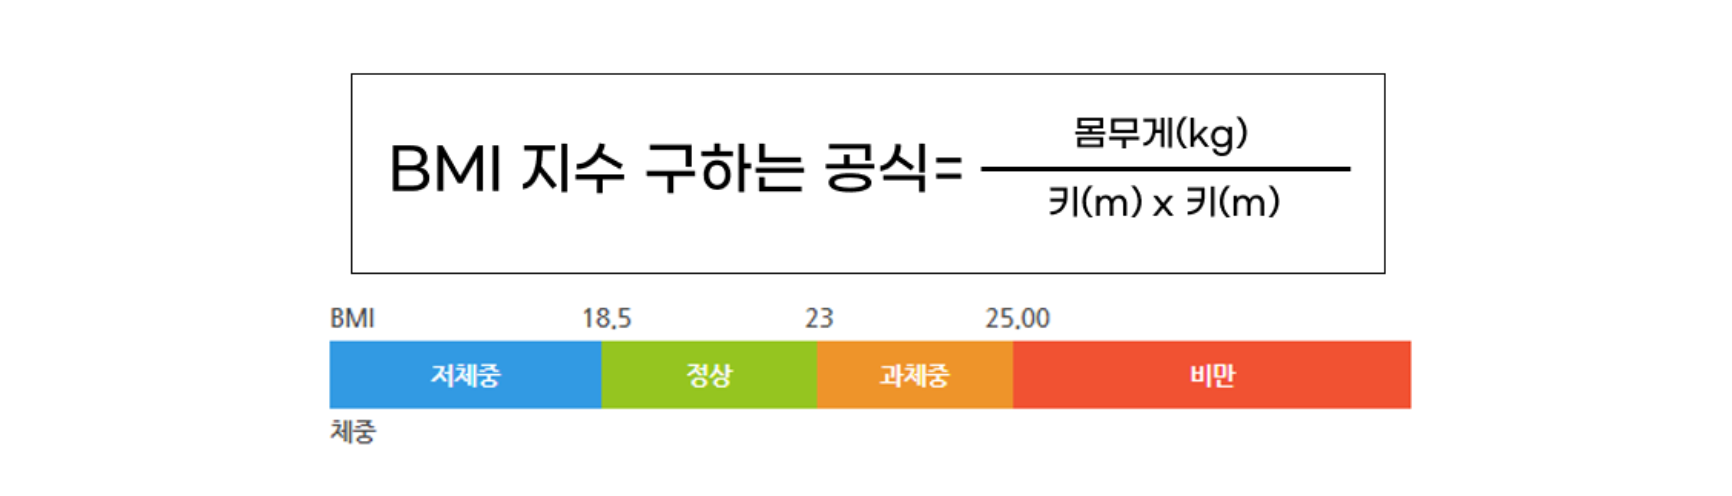

In [2]:
import pandas as pd
data = pd.read_csv("./data/육군신체측정정보.csv")
data

C:\Users\notye\AppData\Local\Temp\ipykernel_33372\3044120650.py:2: DtypeWarning: Columns (2,3,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data/육군신체측정정보.csv")


,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg
...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167979,167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167980,167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg
167981,167982,20170131,85.3 cm,86.8 cm,173.6 cm,75.9 cm (29.9 in),76.6 cm,57.6 cm,24.3 cm,57.4 kg


In [3]:
data.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167983 entries, 0 to 167982
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   순번          167983 non-null  int64 
 1   측정 일자       167983 non-null  int64 
 2   가슴 둘레 센티미터  167982 non-null  object
 3   소매길이 센티미터   167983 non-null  object
 4   신장 센티미터     167983 non-null  object
 5   허리 둘레 센티미터  167983 non-null  object
 6   샅높이 센티미터    167983 non-null  object
 7   머리 둘레 센티미터  167981 non-null  object
 8   발 길이 센티미터   167983 non-null  object
 9   몸무게 킬로그램    167983 non-null  object
dtypes: int64(2), object(8)
memory usage: 12.8+ MB


In [7]:
# bmi를 구하기 위해서 단위를 제거해보자.
# 몸무게 / (키 * 키)
height = data["신장 센티미터"].str.replace(' cm', '')
weight = data["몸무게 킬로그램"].str.replace(' kg', '')

In [10]:
# 실수 형태로 형변환. -> astype()
height = height.astype("float")
weight = weight.astype("float")

In [13]:
# (실습) bmi 지수 구해보자.
# cm -> m
# 몸무게 / 키 * 키
data["bmi"] = weight / (height * height * 0.0001)
data

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.272731
1,2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg,23.286726
2,3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg,28.797420
3,4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg,24.372012
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.442077
...,...,...,...,...,...,...,...,...,...,...,...
167978,167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg,24.568108
167979,167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg,25.564359
167980,167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg,25.639322
167981,167982,20170131,85.3 cm,86.8 cm,173.6 cm,75.9 cm (29.9 in),76.6 cm,57.6 cm,24.3 cm,57.4 kg,19.046380


In [19]:
# (실습2) 정상 체중인 사람들을 도회해보자.
# and 연산자 -> 단일값만 비교 가능 -> True or False
# 여러개의 값을 가지고 있는 배열 &로 비교 가능
data[(18.5 <= data['bmi']) & (22.9 >= data['bmi'])]

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
0,1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg,21.272731
4,5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg,21.442077
8,9,20140106,93.8,89.3,178.7 cm,82.9,83.8,57.7,28.6,69.7 kg,21.826479
12,13,20140106,83.1,86.0,172.6 cm,75.7,75.4,57.9,26.2,58.6 kg,19.670529
13,14,2013,94.7,85.1,170.7 cm,81.7,75.3,56.4,26.2,66.7 kg,22.890685
...,...,...,...,...,...,...,...,...,...,...,...
167969,167970,20170131,95.9 cm,86.1 cm,172.3 cm,86.0 cm (33.8 in),76.1 cm,58.4 cm,27.6 cm,64.4 kg,21.692785
167972,167973,20170131,96.7 cm,85.0 cm,169.4 cm,86.5 cm (34.1 in),74.3 cm,60.7 cm,28.1 cm,60.7 kg,21.152509
167973,167974,20170131,84.6 cm,82.8 cm,166.5 cm,78.5 cm (30.9 in),78.2 cm,58.3 cm,27.2 cm,60.8 kg,21.931842
167976,167977,20170131,94.6 cm,89.2 cm,177.8 cm,76.0 cm (29.9 in),78.7 cm,59.6 cm,29.5 cm,65.7 kg,20.782695


In [20]:
# 결측치 전처리
# 어떤 값이 결측치인가? ->
data.isnull().sum()

순번            0
측정 일자         0
가슴 둘레 센티미터    1
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [21]:
# 가슴 둘레 센티미터 열의 결측치 값 가져오기.
data[data["가슴 둘레 센티미터"].isnull()]

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램,bmi
108400,108401,20160307,NaN,85.9,171.3 cm,91.7,79.0,57.1,25.2,69.5 kg,23.684819


In [ ]:
# 결측치 처리하기
# 1. 평균값으로 처리
# 2. 중앙값으로 처리
# 3. 최빈값으로 처리
# 4. 삭제하는 방법

In [30]:
# 모든 가슴 둘레 센티미터가 cm가 붙어있는 데이터 형태가 아님
# float 형태인 것은 그냥 그대로 활용하고, cm가 붙어있는 object 형태인 것은 cm를 지워주자.
def cm_replace(data):
    if type(data) == float:
        return data
    else:
        return data.replace(" cm","")

In [32]:
# apply 함수를 활용해서 cm_replace 함수를 data["가슴 둘레 센티미터"] 컬럼에 적용하기
data["가슴 둘레 센티미터"] = data["가슴 둘레 센티미터"].apply(cm_replace).astype("float")
data["가슴 둘레 센티미터"]

0          96.3
1         101.9
2          99.5
3          98.6
4          94.7
          ...  
167978    100.6
167979     97.9
167980     97.9
167981     85.3
167982     86.6
Name: 가슴 둘레 센티미터, Length: 167983, dtype: float64

In [33]:
data["가슴 둘레 센티미터"].mean()

np.float64(95.59299389220274)

In [34]:
# 가슴둘레센티미터 결측치를 평균값으로 대체
data.loc[data["가슴 둘레 센티미터"].isnull(), "가슴 둘레 센티미터"] = data["가슴 둘레 센티미터"].mean()

In [35]:
data.isnull().sum()

순번            0
측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    2
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64

In [36]:
# 결측치가 존재하는 행을 삭제 -> dropna(inplace 속성으로 삭제된 값 적용.) -> drop NaN
data.dropna(inplace = True)

In [37]:
data.isnull().sum()

순번            0
측정 일자         0
가슴 둘레 센티미터    0
소매길이 센티미터     0
신장 센티미터       0
허리 둘레 센티미터    0
샅높이 센티미터      0
머리 둘레 센티미터    0
발 길이 센티미터     0
몸무게 킬로그램      0
bmi           0
dtype: int64